## Principal component regression
***

In [10]:
require(pls)
library(ISLR)
Hitters <- na.omit(Hitters)

*scale = True* - Standarization of each predictor. <br>
*validation = CV* - compute the 10 fold croos validation error for every possible M.

In [55]:
x <- model.matrix (Salary∼.,Hitters)[,-1]
y <- Hitters$Salary
pcr.fit <- pcr(Salary ~ ., data = Hitters, scale = TRUE, validation = "CV")
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    355.4    354.5    354.2    350.7    348.6    347.6
adjCV          452    354.9    354.0    353.6    350.1    347.8    346.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       347.8    349.1    350.7     355.0     355.5     358.2     360.8
adjCV    346.8    348.0    349.5     353.4     353.9     356.5     359.0
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        354.9     355.3     346.4     348.7     346.3     350.7
adjCV     352.8     353.3     344.3     346.3     344.0     348.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

Note: pcr() reports the root mean squared error; in order to obtain the usual MSE, we must square this quantity.

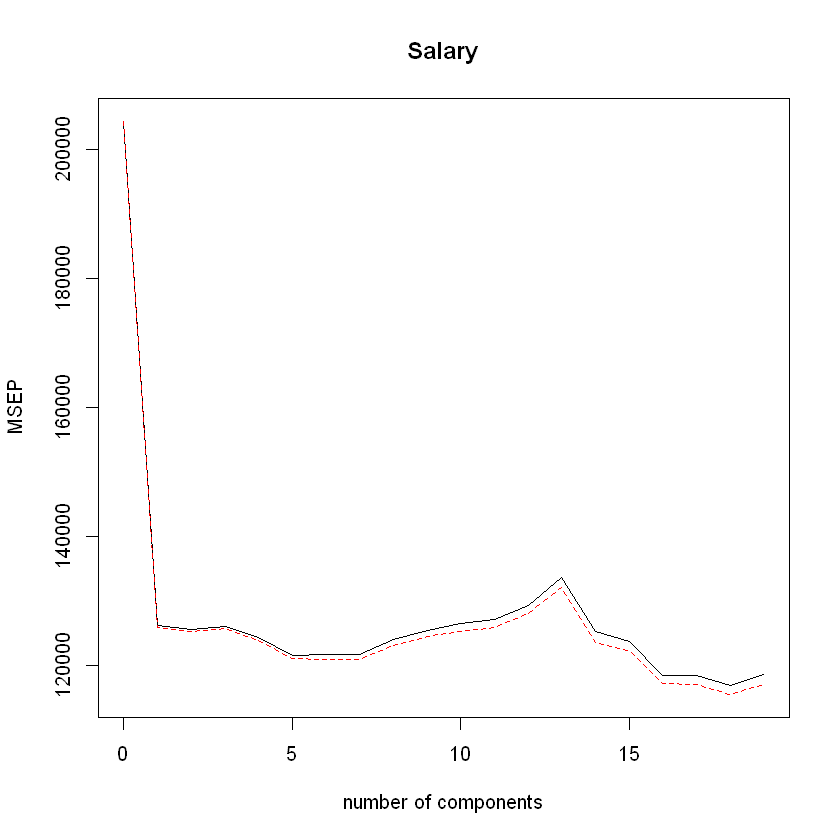

In [15]:
validationplot(pcr.fit,val.type = "MSEP")

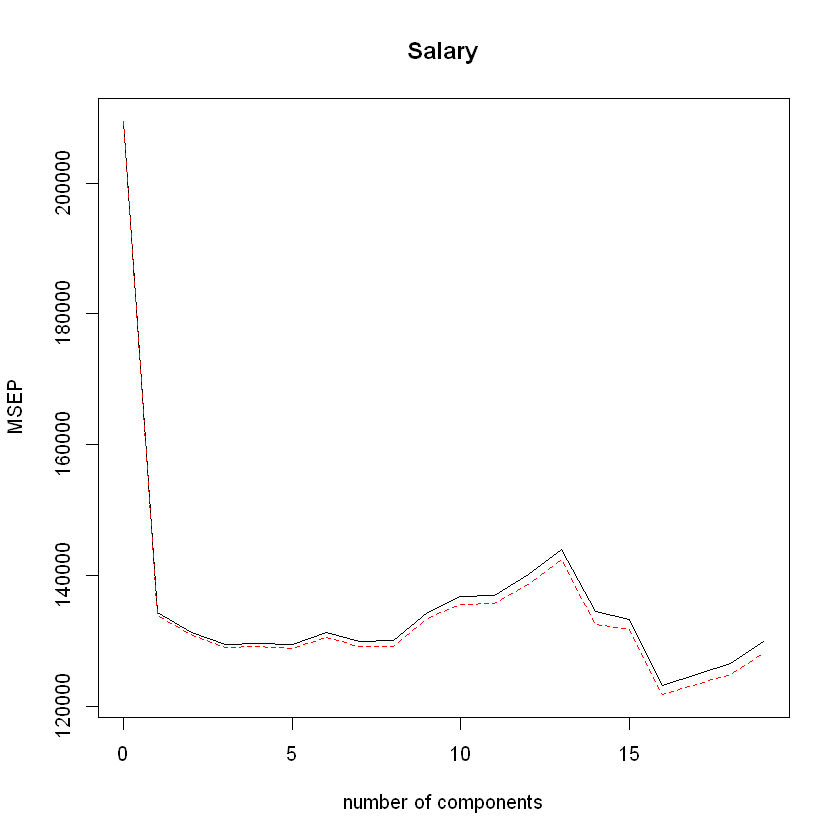

In [63]:
train <- sample(seq(nrow(Hitters)),180,replace = FALSE)
pcr.fit.train <- pcr(Salary ~ ., data = Hitters[train,], scale = TRUE, validation = "CV")
validationplot(pcr.fit.train,val.type = "MSEP")

In [64]:
MSE <- MSEP(pcr.fit)$val
total <- length(MSE)/2
CVE <- rep(NA,total)
adjCVE <- rep(NA,total)
for(i in 1:total){
    CVE[i] <- MSEP(pcr.fit.train)$val[2*i-1]
    adjCVE[i] <- MSEP(pcr.fit.train)$val[2*i]
}

CVErrors <- data.frame(CVE,adjCVE)
rownames(CVErrors) <- 0:(total-1)
CVErrors[order(CVErrors$CVE),]

,CVE,adjCVE
16,123137.0,121807.7
17,124962.0,123407.6
18,126615.4,124938.5
3,129464.0,129036.5
5,129491.5,128899.0
4,129606.5,129120.6
19,129932.8,128056.4
7,130004.6,129236.7
8,130017.0,129225.8
6,131291.9,130614.7


In [68]:
pcr.pred <- predict(pcr.fit.train,x[-train,],ncomp = 5)
pred.error <- mean((y[-train]-pcr.pred)^2)
pred.error

[1] 100879.2

In [70]:
pcr.fit <- pcr(Salary~.,data = Hitters, scale = TRUE,ncomp = 5)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps
X         38.31    60.16    70.84    79.03    84.29
Salary    40.63    41.58    42.17    43.22    44.90


## Partial Least Squares
***

In [81]:
pls.fit.train <- plsr(Salary~.,data = Hitters[train,], scale = TRUE,validation = "CV")
summary(pls.fit.train)

Data: 	X dimension: 180 19 
	Y dimension: 180 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           457.6    363.1    365.2    370.5    374.1    380.4    379.3
adjCV        457.6    362.5    364.1    368.8    371.9    377.3    375.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       378.4    373.9    367.3     368.4     367.0     366.3     367.5
adjCV    374.8    370.6    364.5     365.5     364.1     363.5     364.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        367.4     368.1     368.9     369.2     369.7     371.1
adjCV     364.5     365.2     365.9     366.2     366.6     367.9

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         37.58    53.40    67.15    74.20    78.40    83.78    87.84    89.82
Salary 

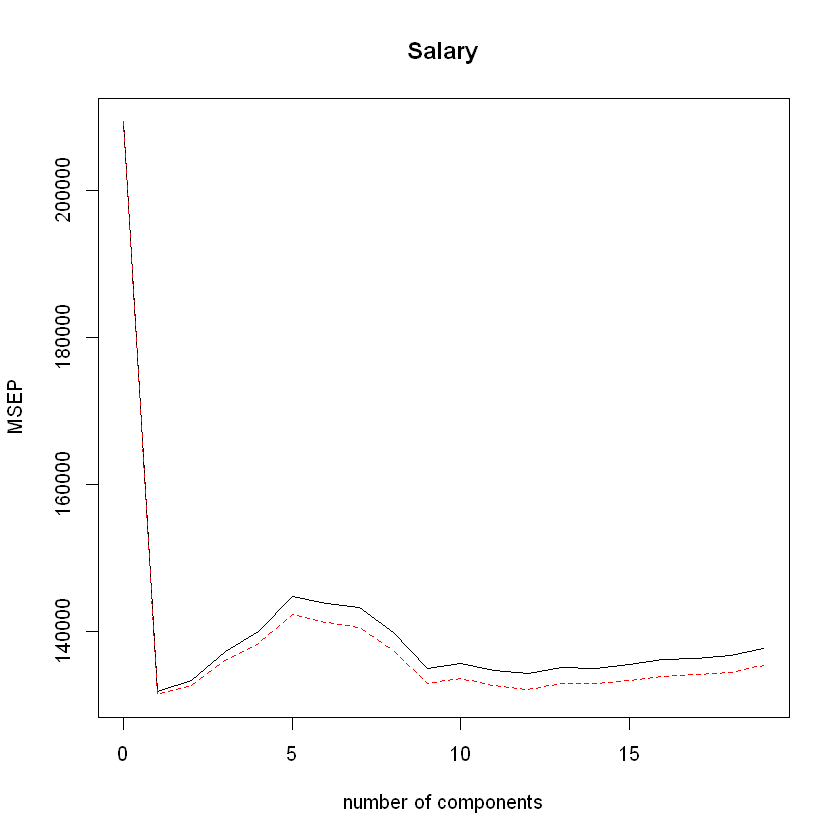

In [82]:
validationplot(pls.fit.train,val.type = "MSEP")

In [83]:
pls.pred <- predict(pls.fit.train,x[-train,],ncomp = 2)
pls.predError <- mean((y[-train]-pls.pred)^2)
pls.predError

[1] 102631.1

In [87]:
pls.fit <- plsr(Salary~.,data = Hitters,scale = TRUE,ncomp=2)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40
